<h2><b>Heart Disease Prediction Using AutoML</b></h2>

<h4><u>Abstract</u><h4>
<p>One of the prominent diseases that affect many people during middle or old age is heart disease, and in many cases it eventually leads to fatal complications. Heart diseases are more prevalent in men than in women. According to statistics from WHO, it has been estimated that 24% of deaths due to non-communicable diseases in India are caused by heart ailments.

The aim of the Notebook is to use an AutoML library like H2O.ai to create predictive models and determine the important features to predict if a patient is suffering from a heart disease or not. The notebook has used statistical methods like OLF, VIF and analyse how well different models perform.

<h4><u>Data Set</u><h4>
<p>

1. 14 features of a patient i.e age, sex, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num
2. num - The dependent variable which is either 1 (Diseased) or 0 (Not Diseased)
3. We have various patients ranging from an age of 28 to 79
4. There are 920 observations with a couple null values
</p>

<h4><u>Feature Information</u></h4>
<table>
  <tr>
    <th>Feature</th>
    <th>Feature Description</th>
    <th>Range of Values</th>
  </tr>
  <tr>
    <td>age</td>
    <td>Age of person in years</td>
    <td>28 to 79</td>
  </tr>
  <tr>
    <td>sex</td>
    <td>Gender of Person (0=Female, 1=Male)</td>
    <td>0, 1</td>
  </tr>
  <tr>
    <td>cp</td>
    <td>Chest pain type <br> 0 - Angina <br> 1 - Atypical Type Angina <br> 2 - Non-angina pain <br> 3 - Asymptomatic</td>
    <td>0, 1, 2, 3</td>
  </tr>
  <tr>
    <td>trestbps</td>
    <td>Resting Blood Pressure in mm Hg</td>
    <td>94 to 200</td>
  </tr>
  <tr>
    <td>chol</td>
    <td>Serum cholesterol in mg/dl</td>
    <td>126 to 564</td>
  </tr>
  <tr>
    <td>fbs</td>
    <td>Fasting Blood Sugar in mg/dl</td>
    <td>0, 1</td>
  </tr>
  <tr>
    <td>restecg</td>
    <td>Resting Electrocardiographic Results</td>
    <td>0, 1, 2</td>
  </tr>
  <tr>
    <td>thalch</td>
    <td>Maximum Heart Rate Achieved</td>
    <td>71 to 202</td>
  </tr>
  <tr>
    <td>exang</td>
    <td>Exercise Induced Angina</td>
    <td>0, 1</td>
  </tr>
  <tr>
    <td>oldpeak</td>
    <td>ST depression induced by exercise relative to rest</td>
    <td>1 to 3</td>
  </tr>
  <tr>
    <td>slope</td>
    <td>Slope of the Peak Exercise ST segment</td>
    <td>1, 2, 3</td>
  </tr>
  <tr>
    <td>ca</td>
    <td>Number of major vessels colored by fluoroscopy</td>
    <td>0 to 3</td>
  </tr>
    <td>thal</td>
    <td>Duration of the exercise test in minutes <br> 3 – Normal, 6 – Fixed Defect, 7 – Reversible Defect</td>
    <td>3, 6, 7</td>
  </tr>
  </tr>
    <td>num</td>
    <td>Target variable <br></td>
    <td>0 - No Disease <br> 1 - Diseased</td>
  </tr>
</table>

In [73]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [75]:
# Global imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import random, sys, os
import psutil

# H2O
import logging
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn import metrics

In [76]:
# Start h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 hours 35 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_1bco7j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.091 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [77]:
# Reading cleaned data set from Github
data = pd.read_csv('https://raw.githubusercontent.com/dev-kudli/heart-disease-prediction/main/data/heart_disease_prediction_cleaned')
data.drop(['cp', 'restecg', 'Unnamed: 0'], axis=1, inplace=True)

In [78]:
data.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_int,restecg_int
0,63,1,145.0,233.0,1,150.0,0,2.3,0,3,0
1,67,1,160.0,286.0,0,108.0,1,1.5,1,0,0
2,67,1,120.0,229.0,0,129.0,1,2.6,1,0,0
3,37,1,130.0,250.0,0,187.0,0,3.5,0,1,1
4,41,0,130.0,204.0,0,172.0,0,1.4,0,2,0


In [79]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['num'], data.drop(['num'], axis=1)).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    num   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.720
Method:                 Least Squares   F-statistic:                              191.2
Date:                Tue, 28 Feb 2023   Prob (F-statistic):                   2.52e-196
Time:                        23:31:56   Log-Likelihood:                         -330.35
No. Observations:                 740   AIC:                                      680.7
Df Residuals:                     730   BIC:                                      726.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age             0.0057      0.001      4.062      0.000       0.003       0.008
sex             0.2167      0.033      6.495      0.000       0.151       0.282
trestbps        0.0017      0.001      2.449      0.015       0.000       0.003
chol           -0.0003      0.000     -1.941      0.053      -0.001    3.55e-06
fbs             0.0734      0.040      1.828      0.068      -0.005       0.152
thalch         -0.0014      0.000     -2.865      0.004      -0.002      -0.000
exang           0.2048      0.035      5.799      0.000       0.135       0.274
oldpeak         0.0957      0.014      6.609      0.000       0.067       0.124
cp_int         -0.1260      0.017     -7.323      0.000      -0.160      -0.092
restecg_int    -0.0062      0.022     -0.278      0.781      -0.050       0.038
==============================================================================
Omnibus:                        1.510   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.465
Skew:                           0.032   Prob(JB):                        0.481
Kurtosis:                       2.791   Cond. No.                         883.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


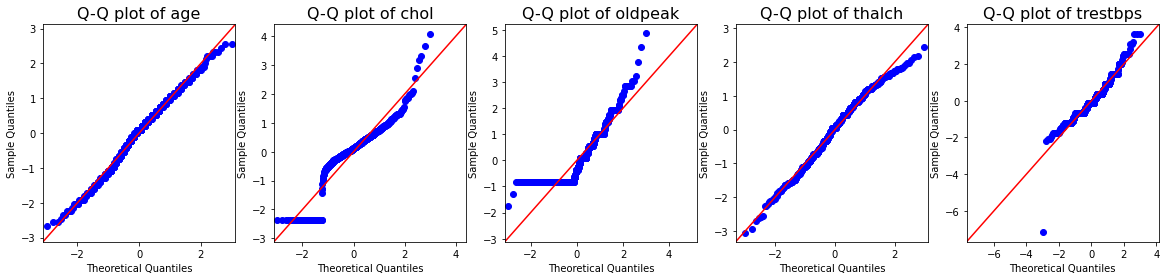

In [80]:
# Checking the distribution of independent variables using Q-Q plot

from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

df = data[['age', 'chol', 'oldpeak', 'thalch', 'trestbps']]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize=(20,4))
axis = [ax1, ax2, ax3, ax4, ax5]
for idx, c in enumerate(df.columns[:]):
  qqplot(df[c], line='45', fit='True', ax=axis[idx])
  axis[idx].set_title("Q-Q plot of {}".format(c),fontsize=16)

plt.show()

<AxesSubplot:>

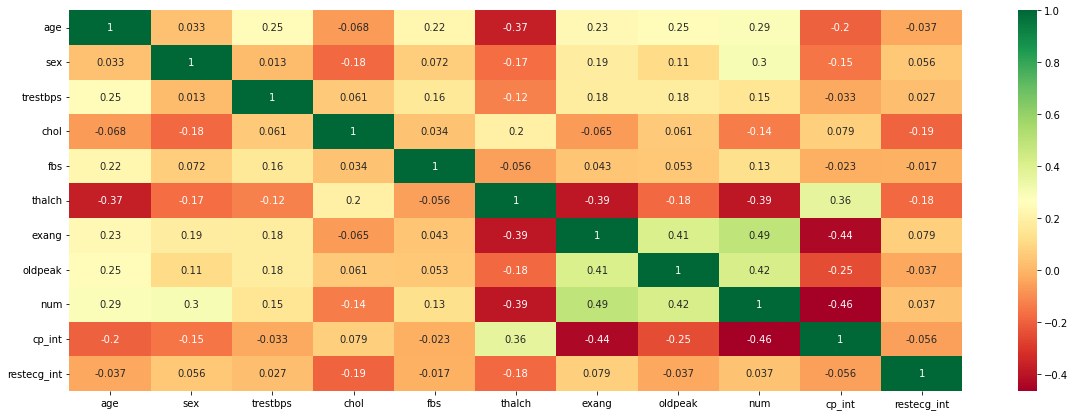

In [81]:
# Heatmap to analyse correlation between variables
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot = True, cmap="RdYlGn")

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = data.drop(['num'], axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

       feature        VIF
0          age  29.425870
1          sex   4.345258
2     trestbps  45.837777
3         chol   7.134495
4          fbs   1.232892
5       thalch  23.940083
6        exang   2.546576
7      oldpeak   2.121180
8       cp_int   2.235181
9  restecg_int   3.207897


<h3>Regularization</h3>

In this Section, we will be using the GBM model to check if regularization is helping us to improve the accuracy and reduce overfitting.

Ridge is a regularization techniques used to prevent overfitting and improve the model's generalization ability.

Ridge regularization adds a penalty term to the least-squares objective function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients of the model, which shrinks the coefficients towards zero. The strength of the penalty is controlled by a hyperparameter called the regularization parameter, which needs to be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.

In [84]:
# Spliting data into Training 70%, Test set 30%
X = data.drop(['num'], axis=1)
y = data['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [113]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

# RMSE after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.3867840575425669

In [87]:
# Reading raw data set from Github
data = h2o.import_file('https://raw.githubusercontent.com/dev-kudli/heart-disease-prediction/main/data/heart_disease_prediction_cleaned')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [88]:
data.head()

C1,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,cp_int,restecg_int
0,63,1,typical angina,145,233,1,lv hypertrophy,150,0,2.3,0,3,0
1,67,1,asymptomatic,160,286,0,lv hypertrophy,108,1,1.5,1,0,0
2,67,1,asymptomatic,120,229,0,lv hypertrophy,129,1,2.6,1,0,0
3,37,1,non-anginal,130,250,0,normal,187,0,3.5,0,1,1
4,41,0,atypical angina,130,204,0,lv hypertrophy,172,0,1.4,0,2,0
5,56,1,atypical angina,120,236,0,normal,178,0,0.8,0,2,1
6,62,0,asymptomatic,140,268,0,lv hypertrophy,160,0,3.6,1,0,0
7,57,0,asymptomatic,120,354,0,normal,163,1,0.6,0,0,1
8,63,1,asymptomatic,130,254,0,lv hypertrophy,147,0,1.4,1,0,0
9,53,1,asymptomatic,140,203,1,lv hypertrophy,155,1,3.1,1,0,0


In [89]:
# Drop unrelated columns
data = data.drop(['C1', 'cp', 'restecg'], axis=1)

In [90]:
# Data Statistics
data.describe()

Rows:740
Cols:11

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_int,restecg_int
type,int,int,int,int,int,int,int,real,int,int,int
mins,28.0,0.0,0.0,0.0,0.0,60.0,0.0,-1.0,0.0,0.0,0.0
mean,53.09729729729729,0.7648648648648648,132.75405405405405,220.13648648648658,0.15,138.7445945945947,0.4,0.8943243243243242,0.5175675675675676,0.7729729729729731,0.9256756756756759
maxs,77.0,1.0,200.0,603.0,1.0,202.0,1.0,6.2,1.0,3.0,2.0
sigma,9.408126694260483,0.4243700839856462,18.58124965528822,93.61455549121159,0.3573129307015762,25.846081524027127,0.490229296547549,1.0871597501178327,0.5000292570893835,0.9391928266919897,0.6274205222348599
zeros,0,174,1,79,629,0,444,329,357,392,175
missing,0,0,0,0,0,0,0,0,0,0,0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,3.0,0.0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,1.0,0.0,0.0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1.0,0.0,0.0


In [91]:
# Reading raw data set from Github
data = h2o.import_file('https://raw.githubusercontent.com/dev-kudli/heart-disease-prediction/main/data/heart_disease_prediction_cleaned')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [92]:
# Drop unrelated columns
data = data.drop(['C1', 'cp', 'restecg'], axis=1)

In [93]:
data.describe()

Rows:740
Cols:11

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_int,restecg_int
type,int,int,int,int,int,int,int,real,int,int,int
mins,28.0,0.0,0.0,0.0,0.0,60.0,0.0,-1.0,0.0,0.0,0.0
mean,53.09729729729729,0.7648648648648648,132.75405405405405,220.13648648648658,0.15,138.7445945945947,0.4,0.8943243243243242,0.5175675675675676,0.7729729729729731,0.9256756756756759
maxs,77.0,1.0,200.0,603.0,1.0,202.0,1.0,6.2,1.0,3.0,2.0
sigma,9.408126694260483,0.4243700839856462,18.58124965528822,93.61455549121159,0.3573129307015762,25.846081524027127,0.490229296547549,1.0871597501178327,0.5000292570893835,0.9391928266919897,0.6274205222348599
zeros,0,174,1,79,629,0,444,329,357,392,175
missing,0,0,0,0,0,0,0,0,0,0,0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,3.0,0.0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,1.0,0.0,0.0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1.0,0.0,0.0


In [94]:
# Shape of data
data.shape

(740, 11)

In [95]:
# Splitting into test, train and validation sets
train, valid, test = data.split_frame(ratios=[0.6,0.1], seed=1234)
response = "num"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  447 82 211


In [96]:
# Building Gradient Boost Model for classification
predictors = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'cp_int', 'restecg_int']
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)
print(gbm)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1677606991900_2667


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          12898                  5            5            5             9             22            15.92

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.04480545995800222
RMSE: 0.21167300243064116
LogLoss: 0.1838436473381438
Mean Per-Class Error: 0.03894018466479326
AUC: 0.9918105178643115
AUCPR: 0.9903650757083194
Gini: 0.983621035728623

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.56

<h3>Now that is quite a bit of information. We can look at them individually</h3>

1. First, we get the error metrics on the train data like log-loss, mean per class error, AUC, Gini, MSE, RMSE
2. Confusion matrix for max F1 threshold
3. Threshold values for different metrics
4. Gains / Lift table
5. Scoring history - information on how the metrics changed in each of the epochs

We have an RMSE of 0.375 which is quite high. Let's tune the model based on learning rate and number of trees to decrease the error

In [97]:
# Model performance on validation set
perf = gbm.model_performance(valid)
print(perf)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.14126597418509723
RMSE: 0.3758536605982403
LogLoss: 0.44067584318263886
Mean Per-Class Error: 0.16126126126126128
AUC: 0.8912912912912911
AUCPR: 0.9111148725943492
Gini: 0.7825825825825823

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3428160315438737
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      30   7    0.1892   (7.0/37.0)
1      6    39   0.1333   (6.0/45.0)
Total  36   46   0.1585   (13.0/82.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.342816     0.857143  45
max f2                       0.0739892    0.894309  65
max f0point5                 0.546793     0.856354  33
max accuracy                 0.342816     0.841463  45
max precision                0.973856     1         0
max recall                   0.0449594   

<h3>Analysing GBM model on validation set</h3>

So using our baseline model, we are getting about 0.89 AUC in valid set and 0.99 AUC in train set. Similarly, log loss is 0.44 in valid set and 0.18 in train set.

Now we can use the validation set to tune our parameters. We can use the early stopping to find the number of iterations to train similar to other GBM implementations. We can set some random values for the parameters to start with.

Please note that, we have added a new validation_frame parameter in this one compared to the previous one while training.

In [109]:
# Tuning GBM model for minimum MSE
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 2500,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.75,
    sample_rate = 0.75,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=test)

gbm Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1677606991900_5249


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    59                 59                          15531                  5            5            5             11            20            16.339

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07474429263966342
RMSE: 0.2733940245134546
LogLoss: 0.2728541585461439
Mean Per-Class Error: 0.07746888799678844
AUC: 0.9725612203934163
AUCPR: 0.9707718803322565
Gini: 0.9451224407868326

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46816332874360106
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      213  22   0.0936   (22.0/235.0)
1      13   199  0.0613   (13.0/212.0)
Total  226  221  0.0783   (35.0/447.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.468163     0.919169  202
max f2                       0.36155      0.940092  217
max f0point5                 0.552425     0.921569  183
max accuracy                 0.468163     0.9217    202
max precision                0.957162     1         0
max recall                   0.171871     1         283
max specificity              0.957162     1         0
max absolute_mcc             0.468163     0.843996  202
max min_per_class_accuracy   0.496407     0.910638  196
max mean_per_class_accuracy  0.468163     0.922531  202
max tns                      0.957162     235       0
max fns                      0.957162     211       0
max fps                      0.0416565    235       399
max tps                      0.171871     212       283
max tnr                      0.957162     1         0
max fnr                      0.957162     0.995283  0
max fpr                      0.0416565    1         399
max tpr                      0.171871     1         283

Gains/Lift Table: Avg response rate: 47.43 %, avg score: 47.46 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0111857                   0.951483           2.10849   2.10849            1                0.955284   1                           0.955284            0.0235849       0.0235849                  110.849   110.849            0.0235849
2        0.0201342                   0.946937           2.10849   2.10849            1                0.948504   1                           0.952271            0.0188679       0.0424528                  110.849   110.849            0.0424528
3        0.0313199                   0.940244           2.10849   2.10849            1                0.944473   1                           0.949486            0.0235849       0.0660377                  110.849   110.849            0.0660377
4        0.0402685                   0.936766           2.10849   2.10849            1                0.938684   1                           0.947085            0.0188679       0.0849057                  110.849   110.849            0.0849057
5        0.0514541                   0.935113           2.10849   2.10849            1                0.935659   1                           0.944601         

In [99]:
# AUC for tuned GBM model
gbm_tune.model_performance(valid).auc()

0.8966966966966967

We have achieved AUC of 0.897 which is satisfactory

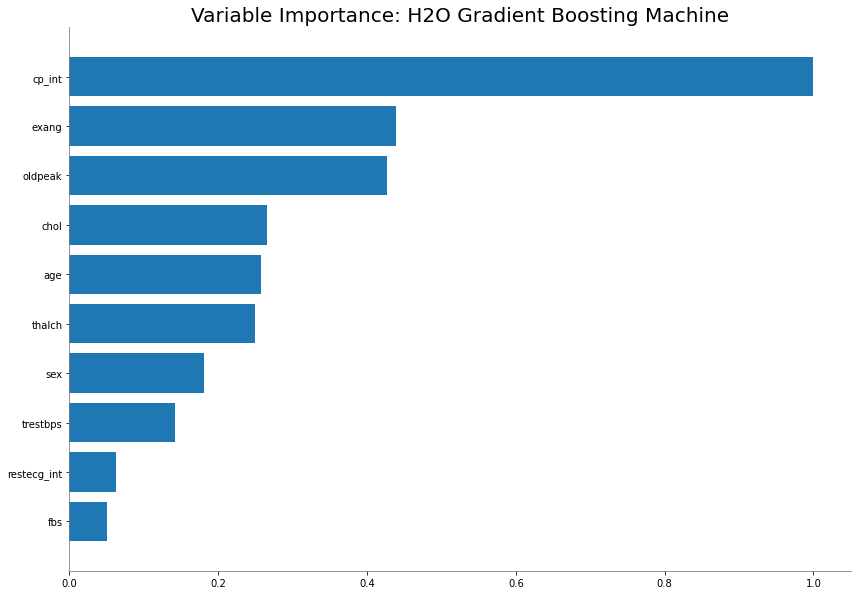

<Figure size 432x288 with 0 Axes>

In [100]:
# Variable importance - GBM
gbm_tune.varimp_plot()

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_model_python_1677606991900_2720

,0,1,Error,Rate
0,54.0,31.0,0.3647,(31.0/85.0)
1,13.0,113.0,0.1032,(13.0/126.0)
Total,67.0,144.0,0.2085,(44.0/211.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

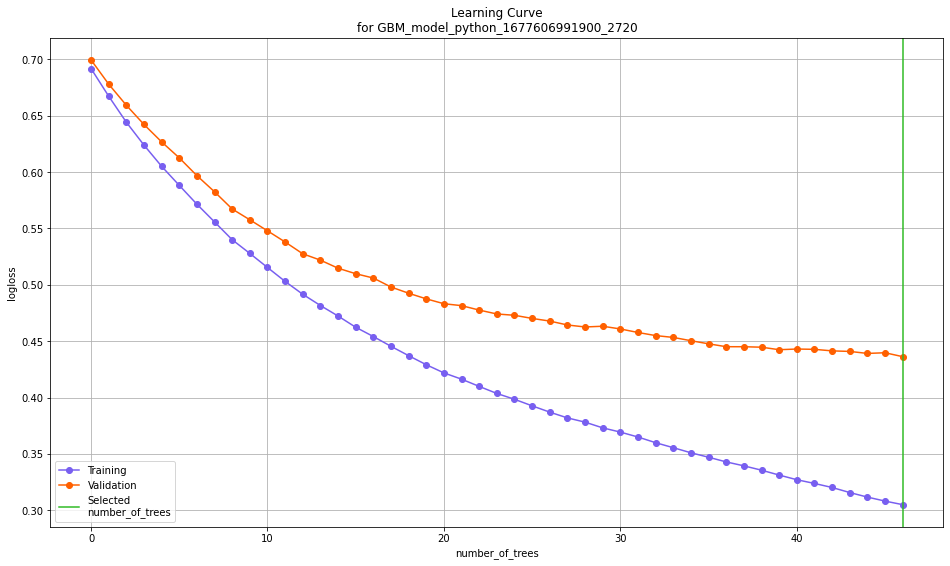

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

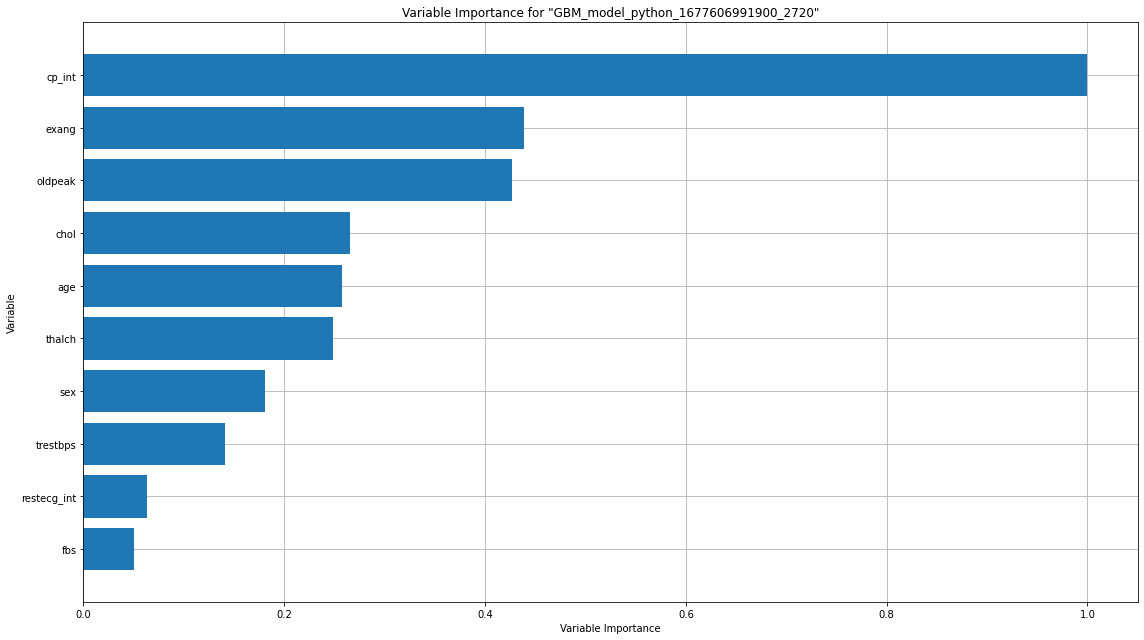

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

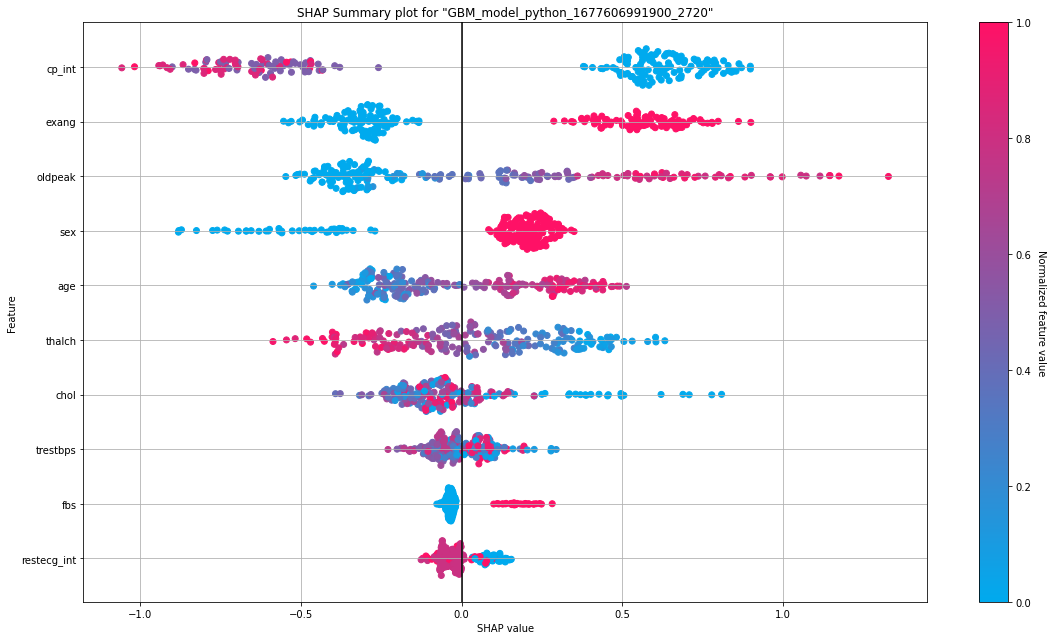

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

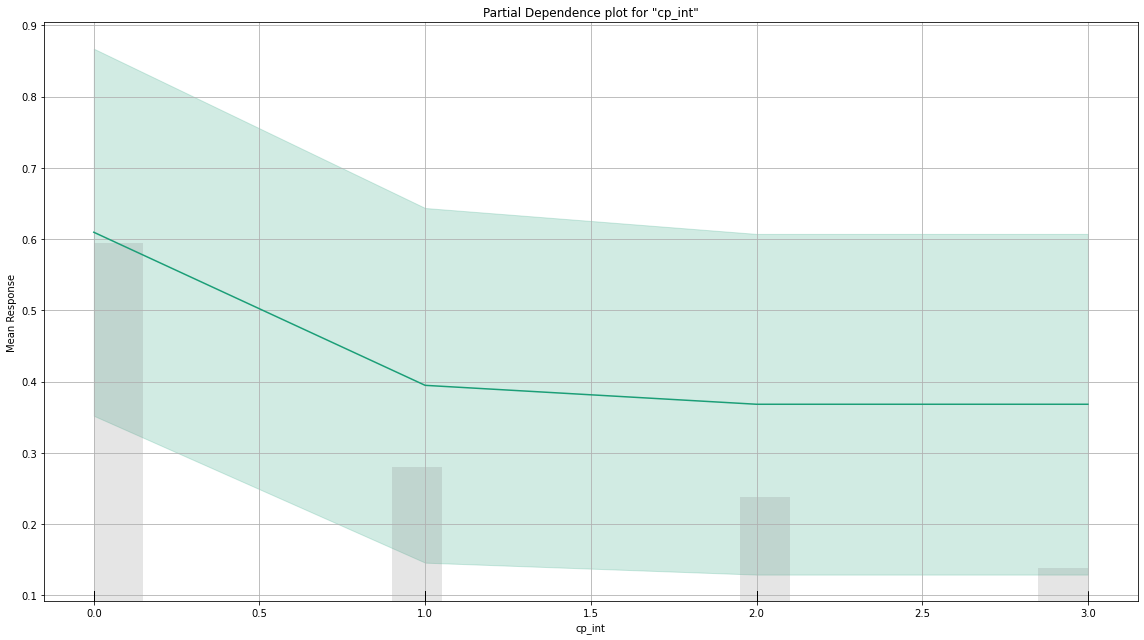

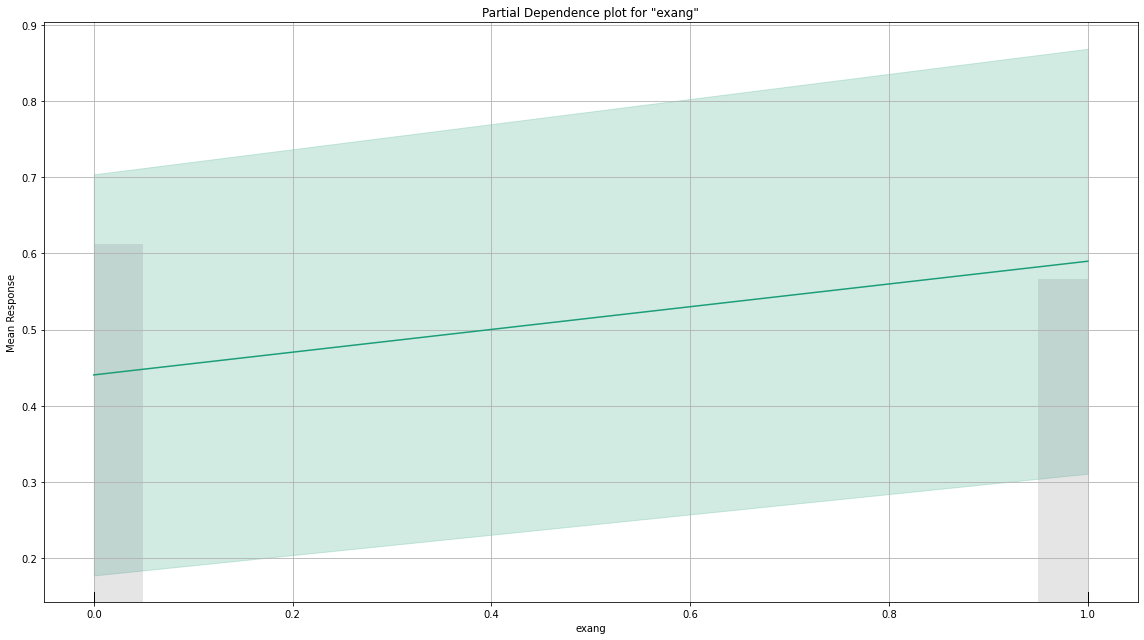

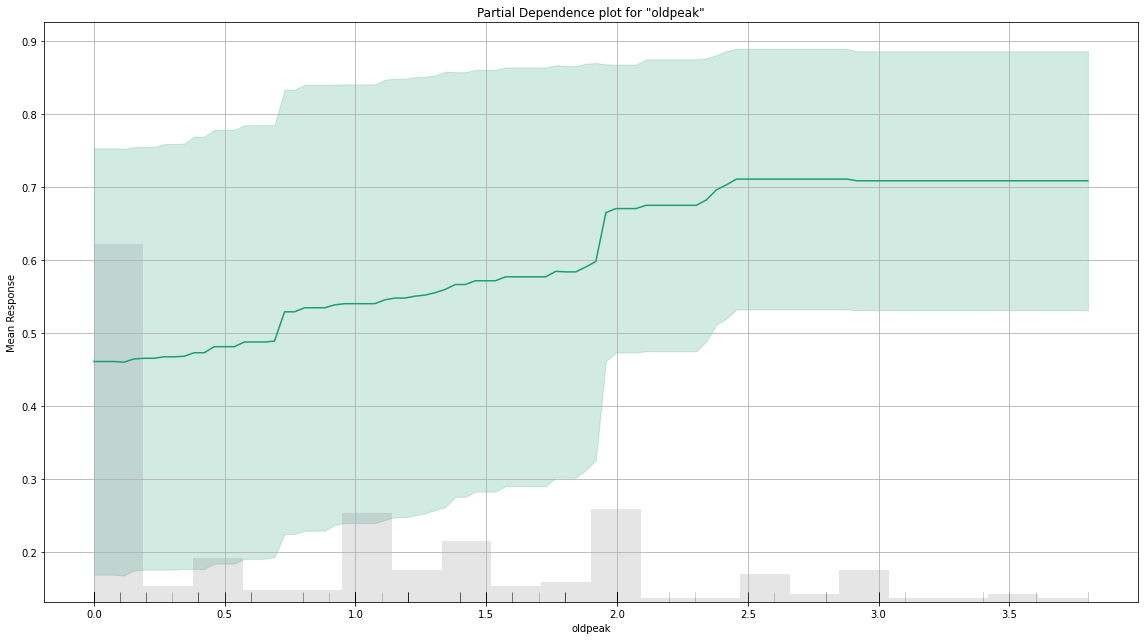

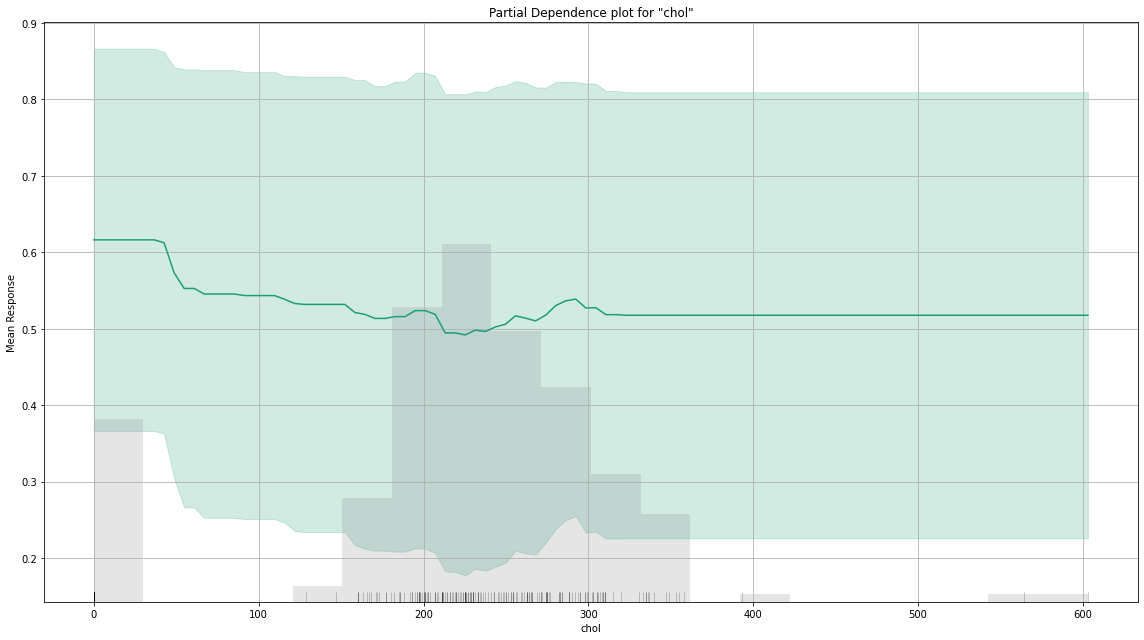

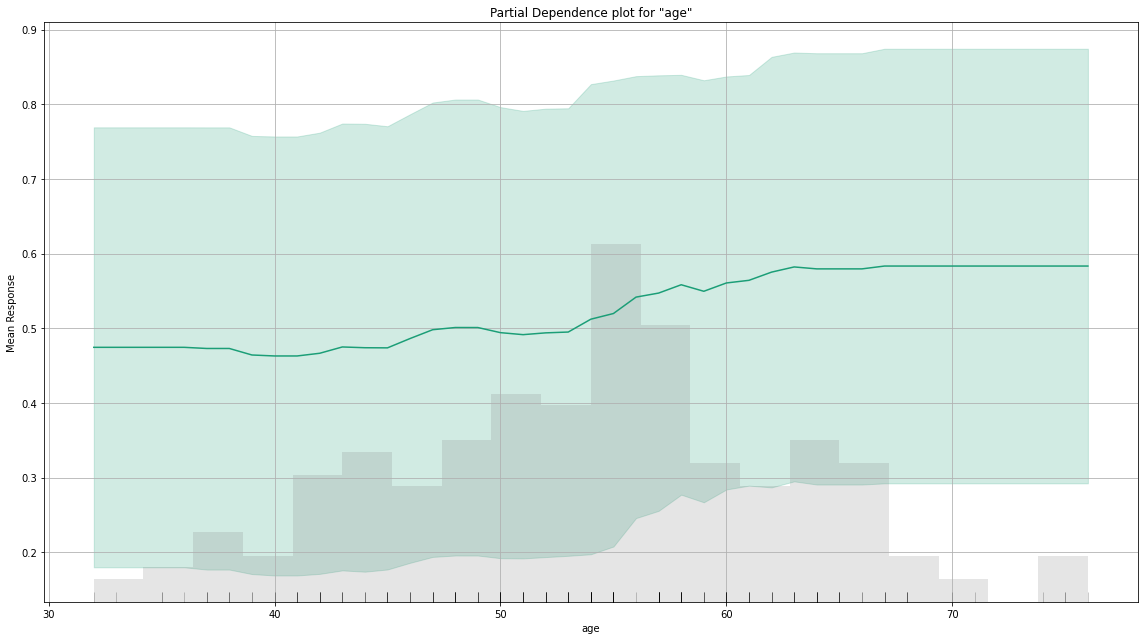

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_model_python_1677606991900_2720

,0,1,Error,Rate
0,54.0,31.0,0.3647,(31.0/85.0)
1,13.0,113.0,0.1032,(13.0/126.0)
Total,67.0,144.0,0.2085,(44.0/211.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [101]:
# Explain GBM
gbm_tune.explain(test)

<h3>Learning Curve Plot</h3>

1. As the training iterations increase, error produced by the model decreases. This applies to train, test and validation data upto a point where it reaches a saturation and cannot reduce the 'irreducable error'
2. We can also observe that validation error has a higher loss at saturation compared to training set which is expected

In [102]:
# AutoML using H2O
aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),0/3
# GLM base models (used / total),1/1
# DRF base models (used / total),0/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [103]:
# Models ranked base on MSE
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_2_20230228_233229,0.890235,0.418334,0.863255,0.158912,0.361081,0.13038
StackedEnsemble_BestOfFamily_1_AutoML_2_20230228_233229,0.887535,0.422646,0.859399,0.170986,0.363552,0.13217
GBM_3_AutoML_2_20230228_233229,0.886762,0.421531,0.865295,0.163629,0.36375,0.132314
GLM_1_AutoML_2_20230228_233229,0.886532,0.42271,0.876815,0.175472,0.363654,0.132244
GBM_4_AutoML_2_20230228_233229,0.882919,0.42765,0.857449,0.17765,0.368134,0.135522
GBM_2_AutoML_2_20230228_233229,0.881875,0.432653,0.859937,0.174779,0.370017,0.136913
DRF_1_AutoML_2_20230228_233229,0.879185,0.647154,0.830713,0.186572,0.373229,0.1393
XGBoost_2_AutoML_2_20230228_233229,0.875492,0.452034,0.840579,0.193517,0.377024,0.142147
XGBoost_3_AutoML_2_20230228_233229,0.873434,0.465101,0.829352,0.193286,0.376381,0.141663
GBM_1_AutoML_2_20230228_233229,0.867914,0.460198,0.852447,0.206132,0.383979,0.14744


In [104]:
# ANalyse the best model
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.15754104374971858
RMSE: 0.3969144035553744
LogLoss: 0.4869442513602925
AUC: 0.8544351073762838
AUCPR: 0.874067992563175
Gini: 0.7088702147525676
Null degrees of freedom: 210
Residual degrees of freedom: 206
Null deviance: 297.2904483050717
Residual deviance: 205.49047407404342
AIC: 215.49047407404342

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26124812114015483
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      55   30   0.3529   (30.0/85.0)
1      14   112  0.1111   (14.0/126.0)
Total  69   142  0.2085   (44.0/211.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.261248     0.835821  141
max f2                       0.0858422    0.909753  182
max f0point5                 0.552471     0.855019  102
max accuracy                 0.349492     0.796209  130
max precision                0.977781     1         0
max recall                   0.051007     1         199
max specificity              0.977781     1         0
max absolute_mcc             0.552471     0.589462  102
max min_per_class_accuracy   0.456846     0.769841  115
max mean_per_class_accuracy  0.552471     0.800373  102
max tns                      0.977781     85        0
max fns                      0.977781     125       0
max fps                      0.0199043    85        210
max tps                      0.051007     126       199
max tnr                      0.977781     1         0
max fnr                      0.977781     0.992063  0
max fpr                      0.0199043    1         210
max tpr                      0.051007     1         199

Gains/Lift Table: Avg response rate: 59.72 %, avg score: 52.51 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.014218                    0.974625           1.1164    1.1164             0.666667         0.97598    0.666667                    0.97598             0.015873        0.015873                   11.6402   11.6402            0.00410831
2        0.0236967                   0.969749           1.6746    1.33968            1                0.971361   0.8                         0.974132            0.015873        0.031746                   67.4603   33.9683            0.0199813
3        0.0331754                   0.967668           1.6746    1.43537            1                0.968638   0.857143                    0.972562            0.015873        0.047619                   67.4603   43.5374            0.0358543
4        0.042654                    0.966578           1.6746    1.48854            1                0.967241   0.888889                    0.97138             0.015873        0.0634921                  67.4603   48.8536            0.0517274
5        0.0521327                   0.956533           1.6746    1.52237            1                0.961399   0.909091                    0.969565            0.015873        0.0793651                  67.4603   52.2367            0.0676004
6        0.104265                    0.941204           1.6746    1.59848            1                0.947234   0.954545                    0.9584              0.0873016       0.166667                   67.4603   59.8485            0.154902
7        0.151659                    0.924738           1.33968   1.51761            0.8              0.933592   0.90625                     0.950648      

In [105]:
# Algorithm used for the best model
best_model.algo

'stackedensemble'

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_2_20230228_233229,1,0.112675,1,0,0.143044,0.0204617,249,0.031412,DRF
XRT_1_AutoML_2_20230228_233229,0.999799,0.175915,0.99978,0.00707547,0.19231,0.0369831,314,0.028977,DRF
GBM_4_AutoML_2_20230228_233229,0.992071,0.199689,0.991273,0.0462967,0.221385,0.0490114,169,0.021806,GBM
GBM_3_AutoML_2_20230228_233229,0.991479,0.201213,0.990961,0.0484243,0.222956,0.0497096,333,0.032627,GBM
GBM_2_AutoML_2_20230228_233229,0.990526,0.201285,0.989474,0.0538338,0.224056,0.050201,180,0.065325,GBM
XGBoost_3_AutoML_2_20230228_233229,0.981624,0.20974,0.979953,0.0647029,0.237938,0.0566144,231,0.020696,XGBoost
StackedEnsemble_AllModels_1_AutoML_2_20230228_233229,0.964723,0.272869,0.962595,0.0878262,0.279846,0.0783135,3578,0.044957,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20230228_233229,0.962385,0.278552,0.960469,0.092774,0.283046,0.0801151,3754,0.057546,StackedEnsemble
XGBoost_2_AutoML_2_20230228_233229,0.946457,0.30705,0.940311,0.111923,0.303135,0.091891,723,0.022445,XGBoost
XGBoost_1_AutoML_2_20230228_233229,0.917252,0.373324,0.913895,0.157296,0.341327,0.116504,396,0.013208,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_2_20230228_233229

,0,1,Error,Rate
0,217.0,18.0,0.0766,(18.0/235.0)
1,21.0,191.0,0.0991,(21.0/212.0)
Total,238.0,209.0,0.0872,(39.0/447.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

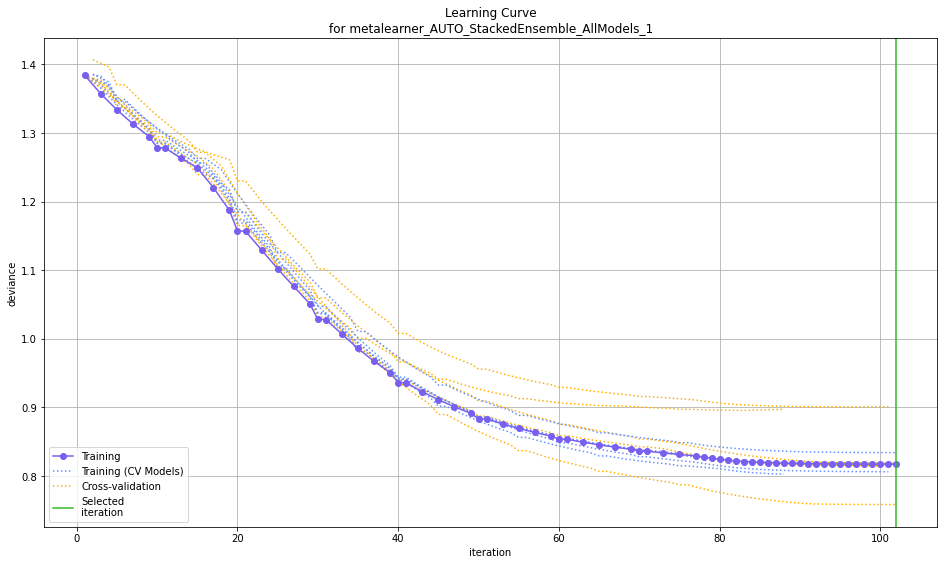

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

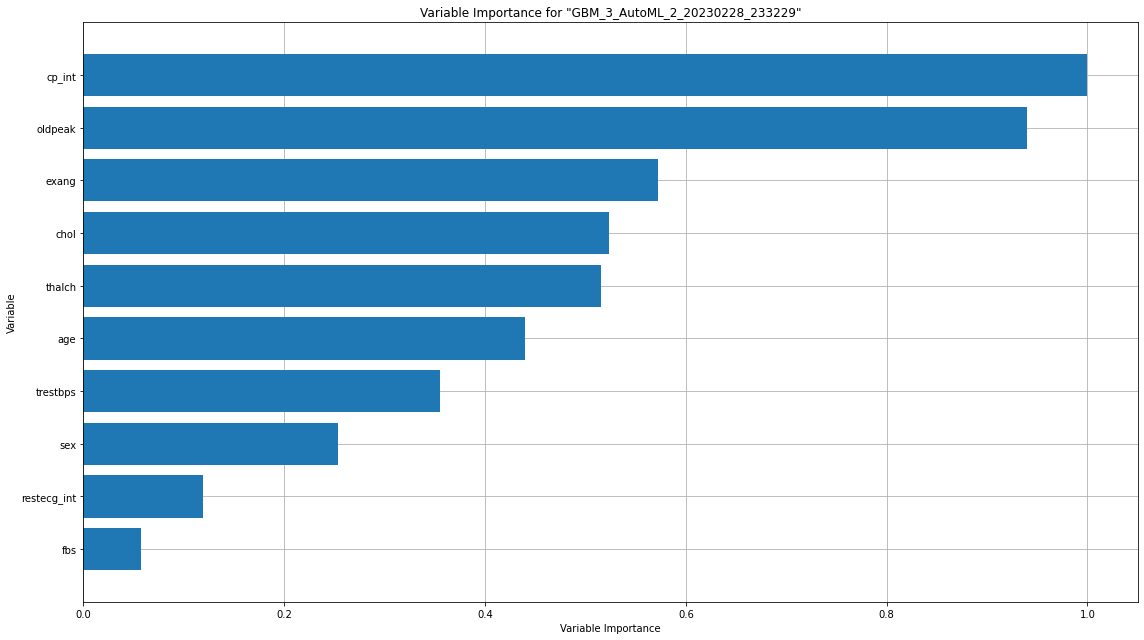

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

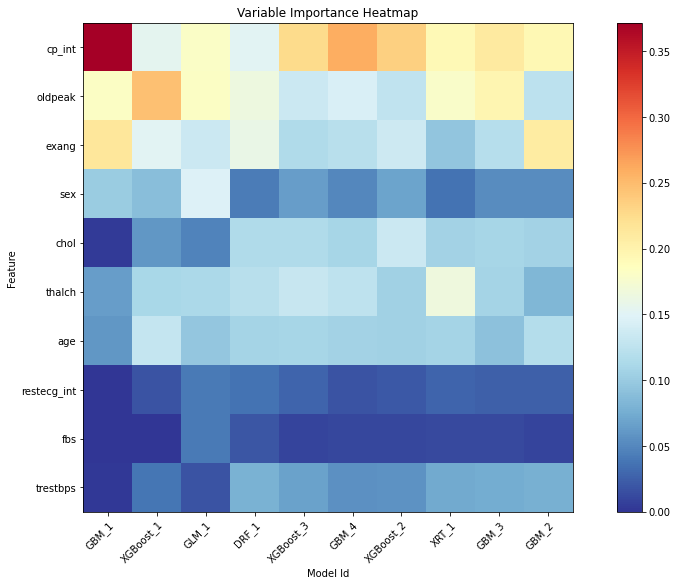

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

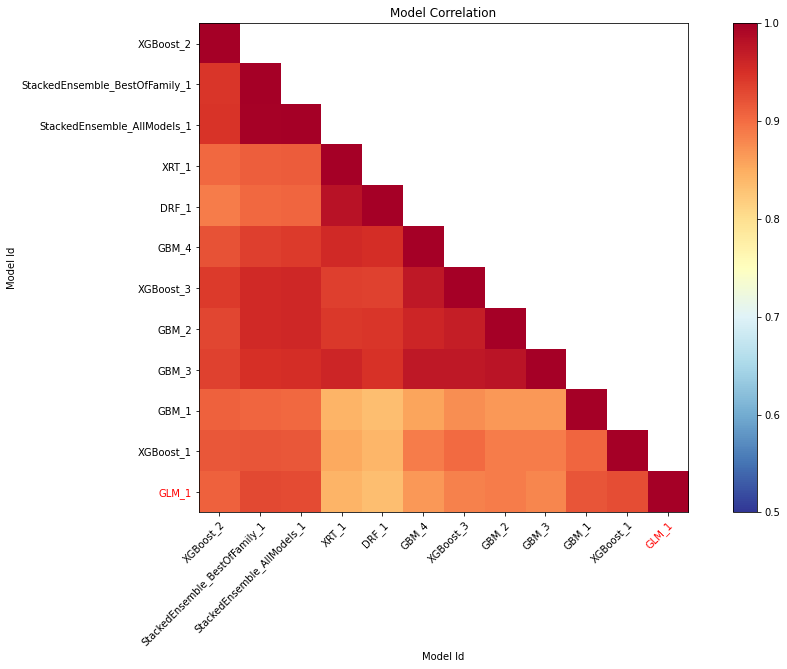

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

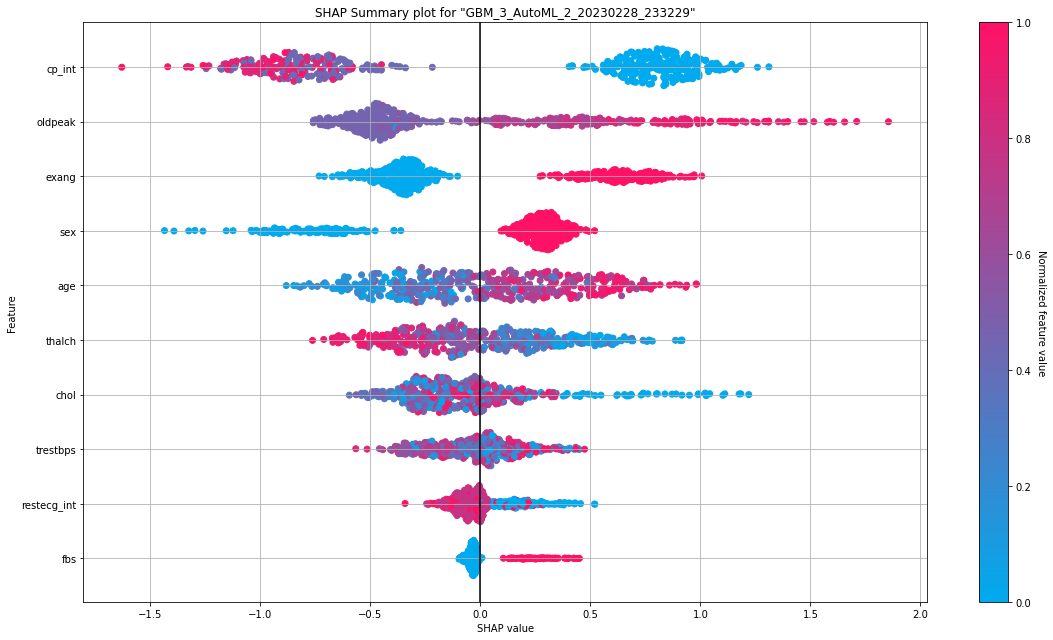

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

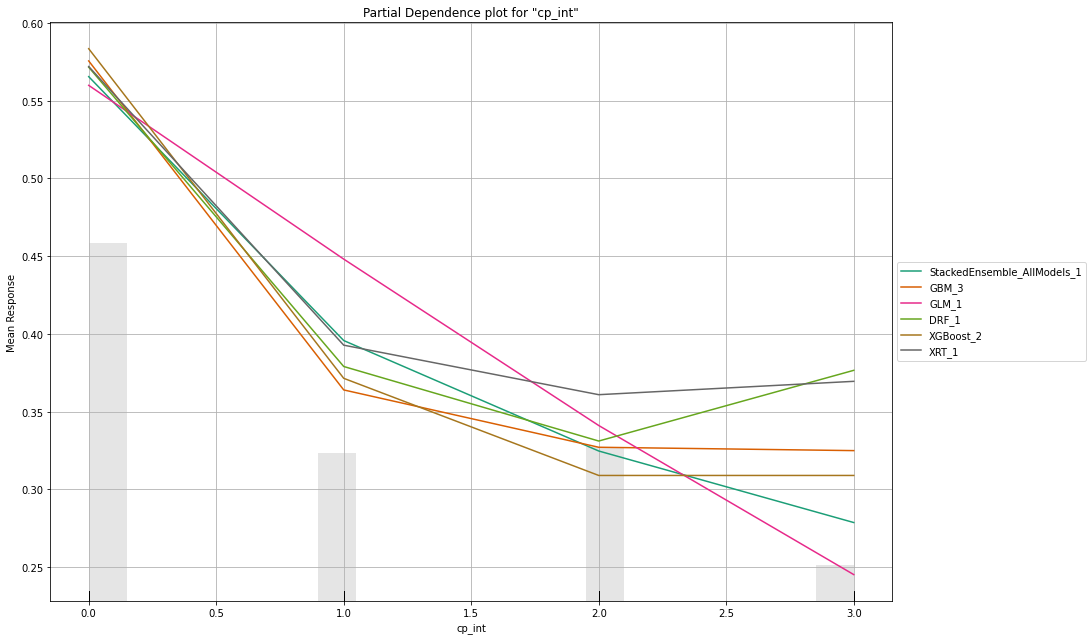

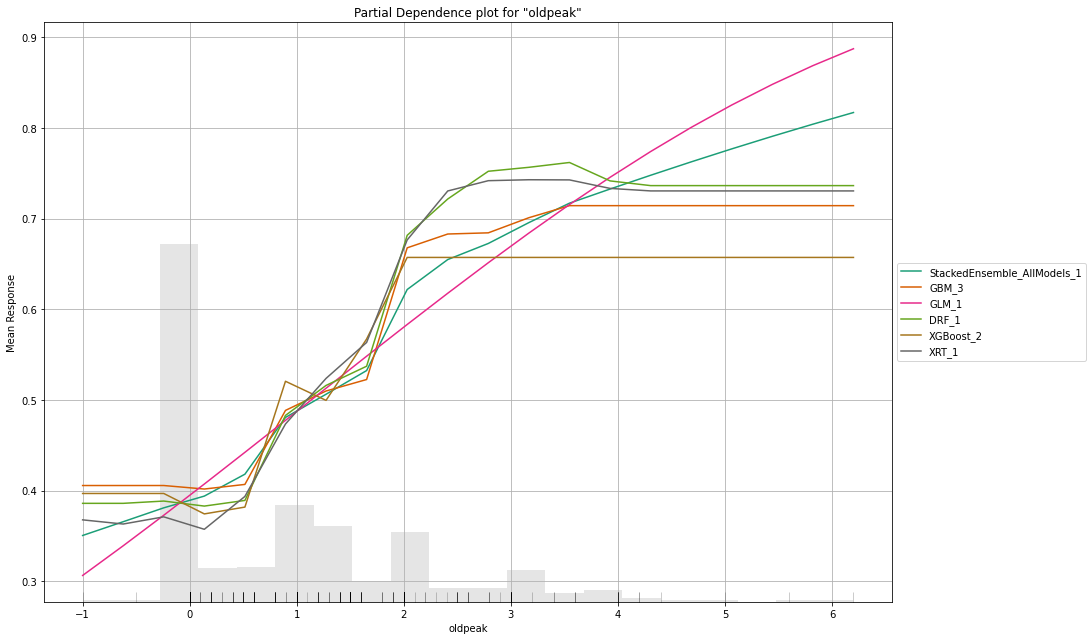

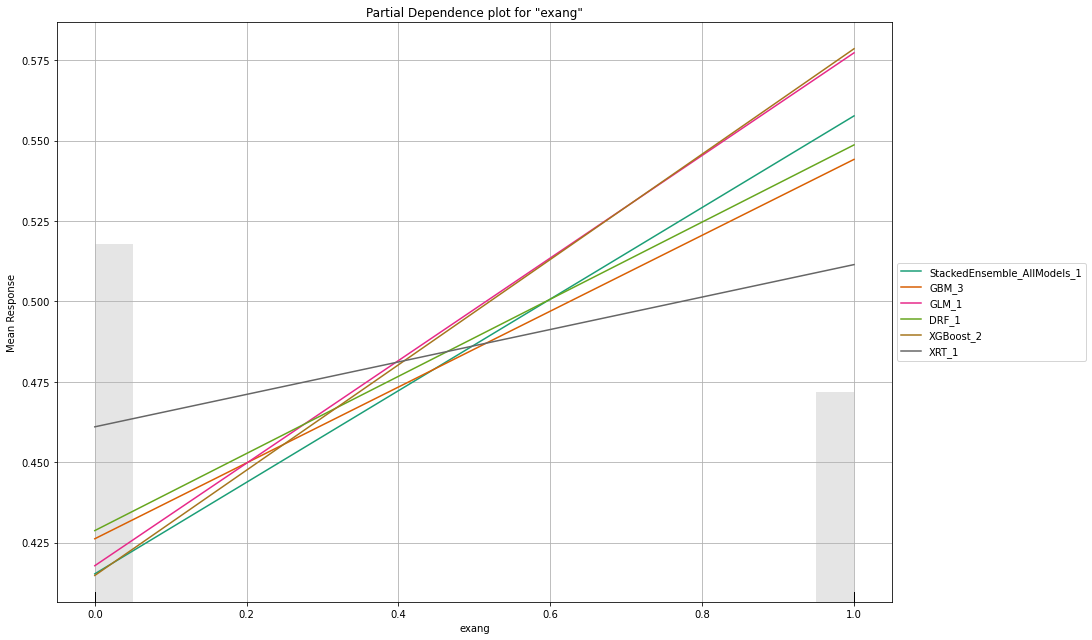

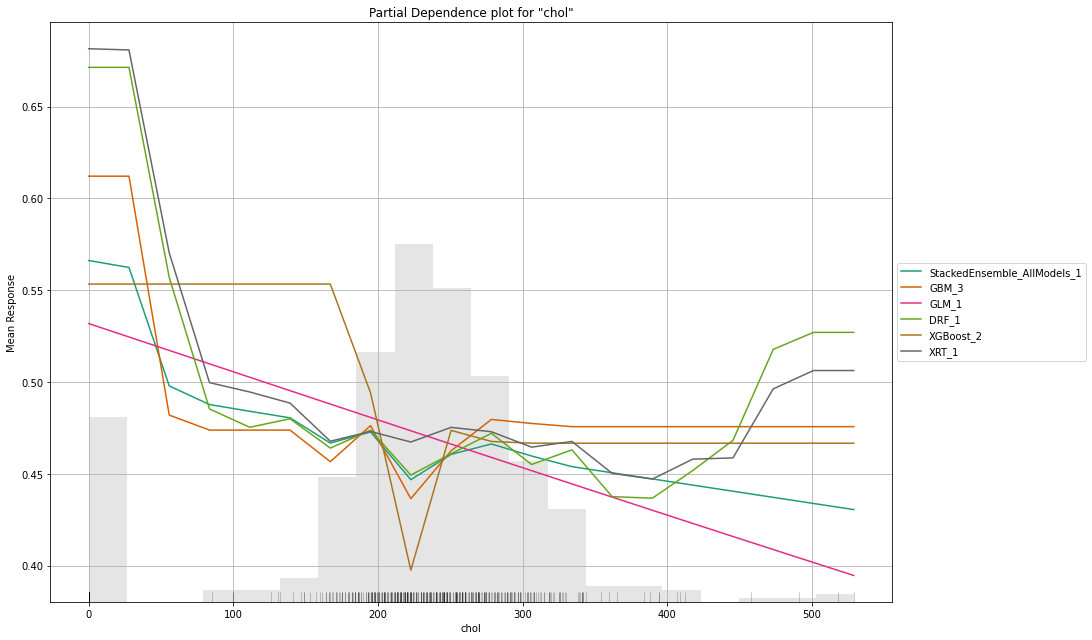

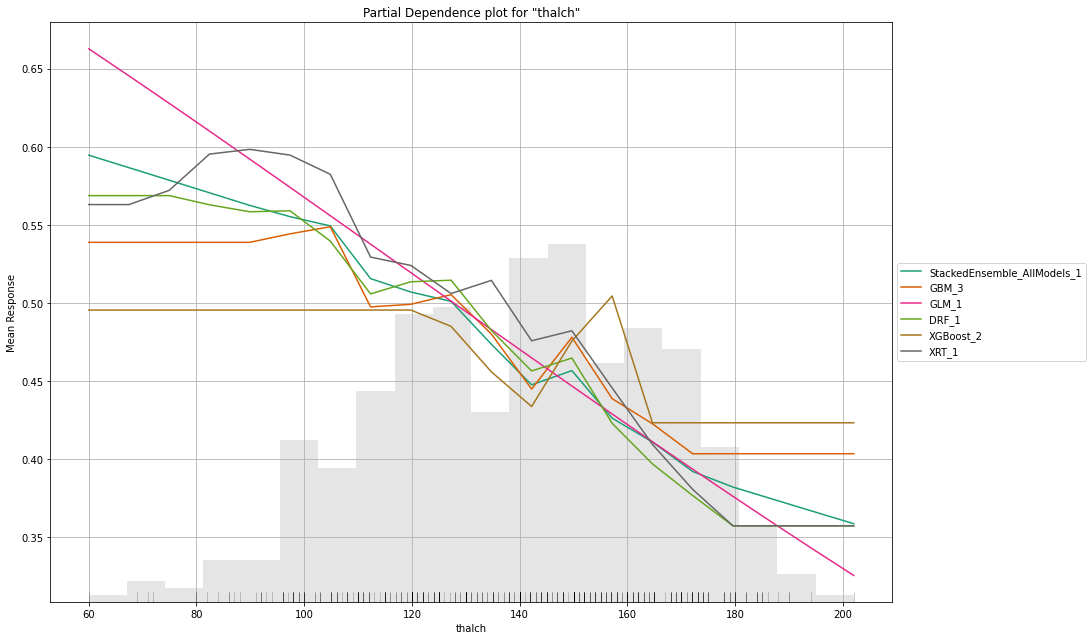

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_2_20230228_233229,1,0.112675,1,0,0.143044,0.0204617,249,0.031412,DRF
XRT_1_AutoML_2_20230228_233229,0.999799,0.175915,0.99978,0.00707547,0.19231,0.0369831,314,0.028977,DRF
GBM_4_AutoML_2_20230228_233229,0.992071,0.199689,0.991273,0.0462967,0.221385,0.0490114,169,0.021806,GBM
GBM_3_AutoML_2_20230228_233229,0.991479,0.201213,0.990961,0.0484243,0.222956,0.0497096,333,0.032627,GBM
GBM_2_AutoML_2_20230228_233229,0.990526,0.201285,0.989474,0.0538338,0.224056,0.050201,180,0.065325,GBM
XGBoost_3_AutoML_2_20230228_233229,0.981624,0.20974,0.979953,0.0647029,0.237938,0.0566144,231,0.020696,XGBoost
StackedEnsemble_AllModels_1_AutoML_2_20230228_233229,0.964723,0.272869,0.962595,0.0878262,0.279846,0.0783135,3578,0.044957,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20230228_233229,0.962385,0.278552,0.960469,0.092774,0.283046,0.0801151,3754,0.057546,StackedEnsemble
XGBoost_2_AutoML_2_20230228_233229,0.946457,0.30705,0.940311,0.111923,0.303135,0.091891,723,0.022445,XGBoost
XGBoost_1_AutoML_2_20230228_233229,0.917252,0.373324,0.913895,0.157296,0.341327,0.116504,396,0.013208,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_2_20230228_233229

,0,1,Error,Rate
0,217.0,18.0,0.0766,(18.0/235.0)
1,21.0,191.0,0.0991,(21.0/212.0)
Total,238.0,209.0,0.0872,(39.0/447.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [106]:
# Explain AutoML
aml.explain(train)

<h3>Learning Curve Plot</h3>

As the training iterations increase, error produced by the model decreases. This applies to train, test and validation data upto a point where it reaches a saturation and cannot reduce the 'irreducable error'

<h3>Variable Importance</h3>

<p>

1. We can observe that 'cp_int' (chest pressure) has the highest importance followed by oldpeak, age, chol and exang
2. Other features assume lesser importance
</p>

<h3>SHAP Summary</h3>

Measure the input features’ contribution to individual predictions

Positive SHAP value means positive impact on prediction, leading the model to predict 1. Negative SHAP value means negative impact, leading the model to predict 0.

<p>

1. Higher 'Chest Pain' indicates higher chances of disease and vice versa
2. Higher 'oldpeak' indicates high negative correlation, i.e high chances of disease
3. High 'fbs' indicates higher chances of disease and vice versa
4. 'sex' variable indicates males are more likely to have a heart disease than women
</p>

<h3>Partial Dependancy Plots</h3>

PDPs give us an idea on how the average model response changes with change in depndant variable

We can observe that 'thalch' and 'cp_int' show gradual

In [107]:
# H2O with XGBoost
from h2o.estimators import H2OXGBoostEstimator

cv_xgb = H2OXGBoostEstimator(
    ntrees = 1000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_xgb.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_xgb.model_performance(valid).auc()

xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%


0.848048048048048

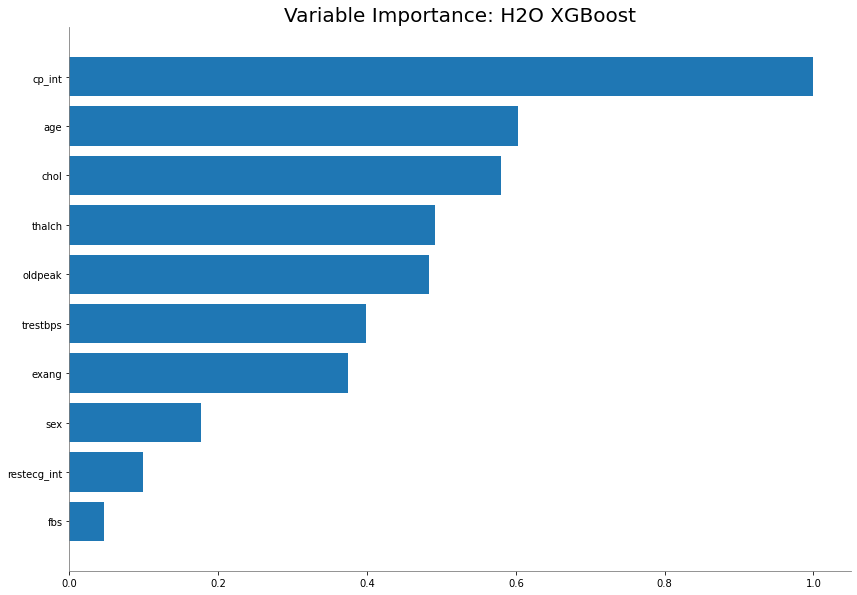

<Figure size 432x288 with 0 Axes>

In [108]:
# Variable Importance - H2O with XGBoost
cv_xgb.varimp_plot()

<h3>Conclusion</h3>

A fundamental algorithm based on the logical regression method to predict heart disease was constructed. VIF, P-values and other tests were considered to ignore some of the independent variables. H20.ai framework was used to train and test the variables of the dataset of Heart Disease Prediction. This gave the best model as 'stackedensemble' and AUC = 89.02%. From the results shown it can be concluded that the proposed model can effectively analyze and predict if a patient has a heart disease to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research

**1) Is the relationship significant?**

A relationship is said to be statistically significant when the p value for the variables is less than the threshold (0.05 in our case). A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. 

P-value was calculated by the OLS method and it was observed that values for 'fbs' and ‘restecg’ were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.
<hr>

**2) Are any model assumptions violated?**

Linear relationship - The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.

Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.

No or little multicollinearity - This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists for 'thalch' with few other variables.

No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. For this model the value is 1.547, therefore this assumption is not violated.
<hr>

**3) Is there any multicollinearity in the model?**

High multicollinearity is an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables.

In this model, 'age', 'trestbps', 'thalch' have VIF value greater than 10 and p value was greater than 0.05.
<hr>

**4) In the multivariate models are predictor variables independent of all the other predictor variables?**

Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used. When correlation matrix is computed for the model, it can be observed that 'thalch' shows mild correlation with 'exang' and 'age'. Other predictors are independent from each other.
<hr>

**5) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model**

A: The most significant predictor variable is 'cp_int' (Chest Pressure), and 'fbs' (Fasting Blood Sugar) is the most insiginificant one.
<hr>

**6) Does the model make sense?**

A: Yes, It's a classfication problem and AutoML can deal with it.
<hr>

**7) Does regularization help?**

A: No, the RMSE from the best model is 0.36 and in regularization, RMSE is 0.387.
<hr>

**8) Which independent variables are significant?**

A: Most significant predictor variable is 'cp_int' followed by 'age', 'chol', 'thalch', 'oldpeak', 'trestbps' and 'exang'
<hr>

**9) Which hyperparameters are important?**

A: All hyperparameters are important because they determined the way model works. Some of the important ones such as max_depth, ntrees in XGBoost and learn_rate, n_trees in GBM were used to determine the best AUC.
<hr>

**10) Coding professionalism?**

A:


<h4><u>MIT License</u></h4>

Copyright (c) 2019 Wok

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

<h3>Refernces</h3>

1. Kaggle - [Notebook](https://www.kaggle.com/code/sid321axn/heart-disease-prediction-using-h20#Modeling-Building)
2. Github Notebook - [Melbourse house prediction](https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb)
3. H20.ai - [Official Docs](https://docs.h2o.ai/)